In [1]:
import pandas
dataset = pandas.read_csv('/Users/chenzy/Documents/spring quarter/tim245/final/crowdfunded_projects_dataset_clean.csv', sep=',')
dataset = dataset.dropna()
dataset = dataset.reset_index(drop=True)

dataset = pandas.get_dummies(dataset)
dataset.head(10)

,amount_funded,project_goal,number_backers,category_Accessories,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Art,category_Art Books,...,"location_San Diego, CA","location_San Francisco, CA","location_San Jose, CA","location_Seattle, WA","location_St. Louis, MO","location_Tokyo, Japan","location_Toronto, Canada","location_Tucson, AZ","location_Vancouver, Canada","location_Washington, DC"
0,170779,15000,4693,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,85593,12000,4689,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30061,5000,4687,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,297808,50000,4679,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,154715,50000,4668,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,120335,35000,4636,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,214152,10000,4634,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,198741,100000,4632,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,151590,20000,4586,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,202760,100000,4583,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1811
[t-SNE] Computed conditional probabilities for sample 1811 / 1811
[t-SNE] Mean sigma: 319.039366
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.733127
[t-SNE] Error after 250 iterations: 0.733127


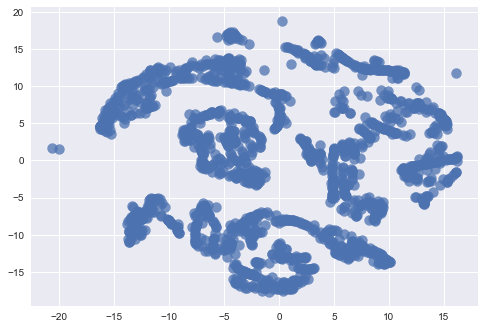

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#create the TSNE representation
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
dataset_tsne = tsne.fit_transform(dataset)

#get the values for the two dimensional representation (x,y) for each instance in the dataset
tsne_x =  dataset_tsne [:,0]
tsne_y = dataset_tsne [:,1]

#plot the data
scatter = plt.scatter(tsne_x, tsne_y, alpha = .75,s = 100)
plt.show()

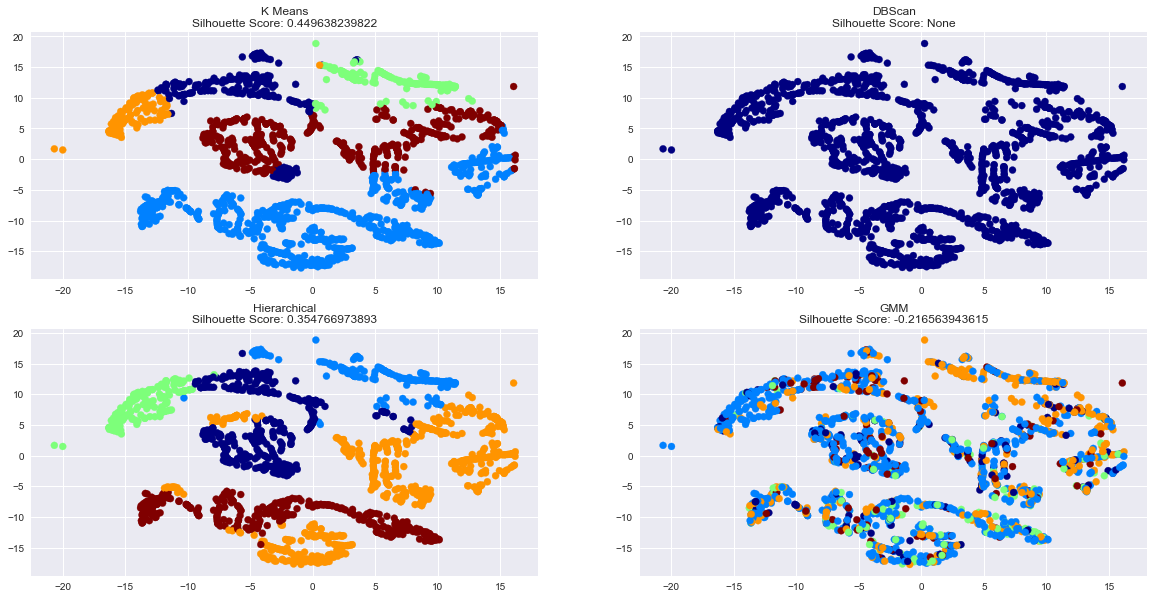

In [3]:
from sklearn import cluster
from matplotlib import pyplot
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn import metrics
plt.rcParams['image.cmap'] = 'jet'

#k is the number of clusters and epsilon is radius in db-scan
k = 5
epsilon = 5
distance_metric = 'euclidean'

#create the clustering models
kmeans = cluster.KMeans(n_clusters=k)
dbscan = cluster.DBSCAN(eps= epsilon)
hierarchical = cluster.AgglomerativeClustering(n_clusters=k, affinity=distance_metric, linkage='ward')
gaussian_mm = mixture.GaussianMixture(n_components=k)

#fit the models to the dataset
kmeans.fit(dataset)
dbscan.fit(dataset)
hierarchical.fit(dataset)
gaussian_mm.fit(dataset)

#get the cluster labels for each instance
kmeans_labels = kmeans.labels_
dbscan_labels = dbscan.labels_
hierarchical_labels = hierarchical.labels_
gaussian_mm_labels = gaussian_mm.predict(dataset)

#compute the silhouette score for each clustering
kmeans_silhouette_score = metrics.silhouette_score(dataset, kmeans_labels, metric=distance_metric)

#must have more than 1 cluster to compute the silhouette_score for dbscan
noise_index = np.argwhere(dbscan_labels==-1)
if(np.unique(np.delete(dbscan_labels,noise_index)).size > 1):
    dbscan_silhouette_score = metrics.silhouette_score(dataset, dbscan_labels, metric=distance_metric)
else:
    dbscan_silhouette_score = None
    
hierarchical_silhouette_score = metrics.silhouette_score(dataset, hierarchical_labels, metric=distance_metric)
gaussian_mm_silhouette_score = metrics.silhouette_score(dataset, gaussian_mm_labels, metric=distance_metric)


#plot the results using the T-SNE representation
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.scatter(tsne_x, tsne_y, c= kmeans_labels)
plt.title('K Means'  + "\n" + 'Silhouette Score: ' + str(kmeans_silhouette_score))
plt.subplot(2,2,2)
plt.scatter(tsne_x, tsne_y, c= dbscan_labels)
plt.title('DBScan'  + "\n" + 'Silhouette Score: ' + str(dbscan_silhouette_score))
plt.subplot(2,2,3)
plt.scatter(tsne_x, tsne_y, c= hierarchical_labels)
plt.title('Hierarchical'  + "\n" + 'Silhouette Score: ' + str(hierarchical_silhouette_score))
plt.subplot(2,2,4)
plt.scatter(tsne_x, tsne_y, c= gaussian_mm_labels)
plt.title('GMM'  + "\n" + 'Silhouette Score: ' + str(gaussian_mm_silhouette_score))
plt.show()

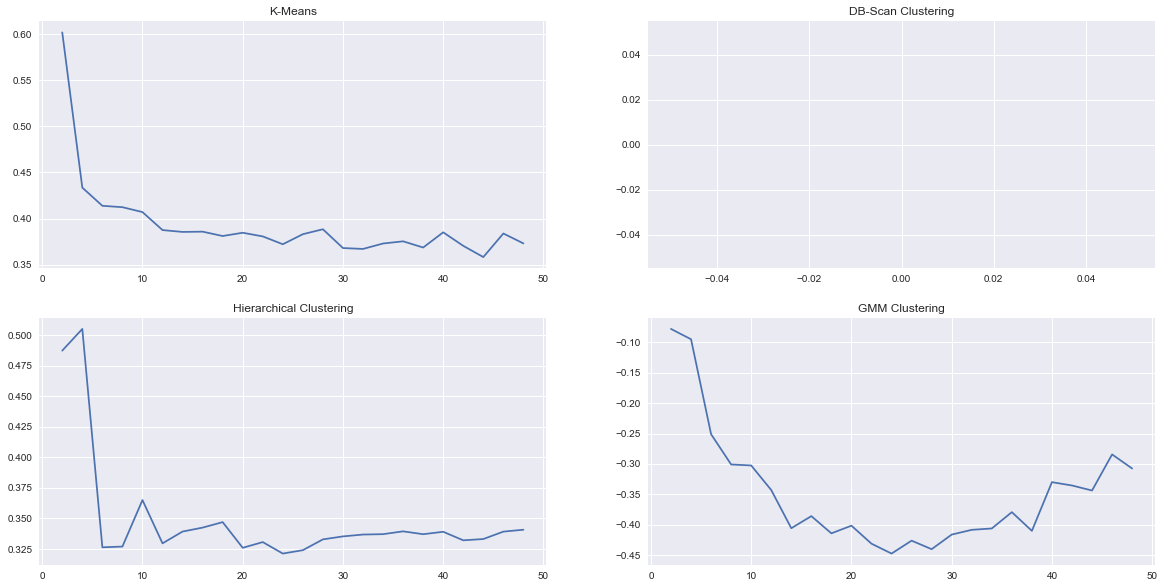

In [4]:
from sklearn import cluster
from matplotlib import pyplot
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn import metrics
plt.rcParams['image.cmap'] = 'jet'

#scores for the parameters
kmeans_silhouette_scores = []
dbscan_silhouette_scores = []
hierarchical_silhouette_scores = []
gaussian_mm_silhouette_scores = []

distance_metric = 'euclidean'

#loop through different values for k and compute the silhouette score
for k in range(2,50,2):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(dataset)
    kmeans_labels = kmeans.labels_
    kmeans_silhouette_score = metrics.silhouette_score(dataset, kmeans_labels, metric=distance_metric)
    kmeans_silhouette_scores.append(kmeans_silhouette_score)

#loop through different values for epsilon and compute the silhouette score
for epsilon in range(2,50,2):
    dbscan = cluster.DBSCAN(eps=epsilon)
    dbscan.fit(dataset)
    dbscan_labels = dbscan.labels_
    #must have more than 1 cluster to compute the silhouette_score
    noise_index = np.argwhere(dbscan_labels==-1)
    if(np.unique(np.delete(dbscan_labels,noise_index)).size > 1):
        dbscan_silhouette_score = metrics.silhouette_score(dataset, dbscan_labels, metric=distance_metric)
        #dbscan_silhouette_scores.append(dbscan_silhouette_score)
    else:
        dbscan_silhouette_score = None
        #dbscan_silhouette_scores.append(0)
    dbscan_silhouette_scores.append(dbscan_silhouette_score)
    
#loop through different values for k and compute the silhouette score
for k in range(2,50,2):
    hierarchical = cluster.AgglomerativeClustering(n_clusters=k, affinity=distance_metric, linkage='ward')
    hierarchical.fit(dataset)
    hierarchical_labels = hierarchical.labels_
    hierarchical_silhouette_score = metrics.silhouette_score(dataset, hierarchical_labels, metric=distance_metric)
    hierarchical_silhouette_scores.append(hierarchical_silhouette_score)
    
#loop through different values for k and compute the silhouette score
for k in range(2,50,2):
    gaussian_mm = mixture.GaussianMixture(n_components=k)
    gaussian_mm.fit(dataset)
    gaussian_mm_labels = gaussian_mm.predict(dataset)
    gaussian_mm_silhouette_score = metrics.silhouette_score(dataset, gaussian_mm_labels, metric=distance_metric)
    gaussian_mm_silhouette_scores.append(gaussian_mm_silhouette_score)
    
#plot silhouette score as function of k and epsilon
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.plot(range(2,50,2),kmeans_silhouette_scores)
plt.title('K-Means')
plt.subplot(2,2,2)
plt.plot(range(2,50,2),dbscan_silhouette_scores)
plt.title('DB-Scan Clustering')
plt.subplot(2,2,3)
plt.plot(range(2,50,2),hierarchical_silhouette_scores)
plt.title('Hierarchical Clustering')
plt.subplot(2,2,4)
plt.plot(range(2,50,2),gaussian_mm_silhouette_scores)
plt.title('GMM Clustering')
plt.show()

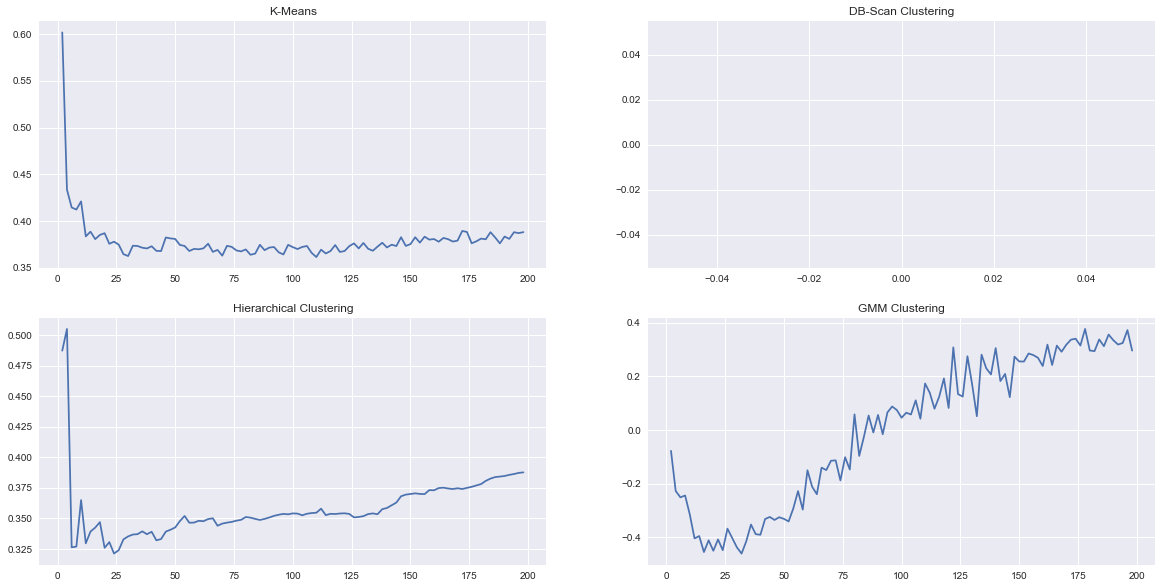

In [5]:
from sklearn import cluster
from matplotlib import pyplot
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn import metrics
plt.rcParams['image.cmap'] = 'jet'

#scores for the parameters
kmeans_silhouette_scores = []
dbscan_silhouette_scores = []
hierarchical_silhouette_scores = []
gaussian_mm_silhouette_scores = []

distance_metric = 'euclidean'

#loop through different values for k and compute the silhouette score
for k in range(2,200,2):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(dataset)
    kmeans_labels = kmeans.labels_
    kmeans_silhouette_score = metrics.silhouette_score(dataset, kmeans_labels, metric=distance_metric)
    kmeans_silhouette_scores.append(kmeans_silhouette_score)

#loop through different values for epsilon and compute the silhouette score
for epsilon in range(2,200,2):
    dbscan = cluster.DBSCAN(eps=epsilon)
    dbscan.fit(dataset)
    dbscan_labels = dbscan.labels_
    #must have more than 1 cluster to compute the silhouette_score
    noise_index = np.argwhere(dbscan_labels==-1)
    if(np.unique(np.delete(dbscan_labels,noise_index)).size > 1):
        dbscan_silhouette_score = metrics.silhouette_score(dataset, dbscan_labels, metric=distance_metric)
        #dbscan_silhouette_scores.append(dbscan_silhouette_score)
    else:
        dbscan_silhouette_score = None
        #dbscan_silhouette_scores.append(0)
    dbscan_silhouette_scores.append(dbscan_silhouette_score)
    
#loop through different values for k and compute the silhouette score
for k in range(2,200,2):
    hierarchical = cluster.AgglomerativeClustering(n_clusters=k, affinity=distance_metric, linkage='ward')
    hierarchical.fit(dataset)
    hierarchical_labels = hierarchical.labels_
    hierarchical_silhouette_score = metrics.silhouette_score(dataset, hierarchical_labels, metric=distance_metric)
    hierarchical_silhouette_scores.append(hierarchical_silhouette_score)
    
#loop through different values for k and compute the silhouette score
for k in range(2,200,2):
    gaussian_mm = mixture.GaussianMixture(n_components=k)
    gaussian_mm.fit(dataset)
    gaussian_mm_labels = gaussian_mm.predict(dataset)
    gaussian_mm_silhouette_score = metrics.silhouette_score(dataset, gaussian_mm_labels, metric=distance_metric)
    gaussian_mm_silhouette_scores.append(gaussian_mm_silhouette_score)
    
#plot silhouette score as function of k and epsilon
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.plot(range(2,200,2),kmeans_silhouette_scores)
plt.title('K-Means')
plt.subplot(2,2,2)
plt.plot(range(2,200,2),dbscan_silhouette_scores)
plt.title('DB-Scan Clustering')
plt.subplot(2,2,3)
plt.plot(range(2,200,2),hierarchical_silhouette_scores)
plt.title('Hierarchical Clustering')
plt.subplot(2,2,4)
plt.plot(range(2,200,2),gaussian_mm_silhouette_scores)
plt.title('GMM Clustering')
plt.show()

In [ ]:
from sklearn import cluster
from matplotlib import pyplot
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn import metrics
plt.rcParams['image.cmap'] = 'jet'

#scores for the parameters
dbscan_silhouette_scores = []
gaussian_mm_silhouette_scores = []

distance_metric = 'euclidean'

#loop through different values for epsilon and compute the silhouette score
for epsilon in range(2,200,2):
    dbscan = cluster.DBSCAN(eps=epsilon)
    dbscan.fit(dataset)
    dbscan_labels = dbscan.labels_
    #must have more than 1 cluster to compute the silhouette_score
    noise_index = np.argwhere(dbscan_labels==-1)
    if(np.unique(np.delete(dbscan_labels,noise_index)).size > 1):
        dbscan_silhouette_score = metrics.silhouette_score(dataset, dbscan_labels, metric=distance_metric)
        #dbscan_silhouette_scores.append(dbscan_silhouette_score)
    else:
        dbscan_silhouette_score = None
        #dbscan_silhouette_scores.append(0)
    dbscan_silhouette_scores.append(dbscan_silhouette_score)
    
#loop through different values for k and compute the silhouette score
for k in range(2,200,2):
    gaussian_mm = mixture.GaussianMixture(n_components=k)
    gaussian_mm.fit(dataset)
    gaussian_mm_labels = gaussian_mm.predict(dataset)
    gaussian_mm_silhouette_score = metrics.silhouette_score(dataset, gaussian_mm_labels, metric=distance_metric)
    gaussian_mm_silhouette_scores.append(gaussian_mm_silhouette_score)
    
#plot silhouette score as function of k and epsilon
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.plot(range(2,200,2),kmeans_silhouette_scores)
plt.title('K-Means')
plt.subplot(2,2,2)
plt.plot(range(2,200,2),dbscan_silhouette_scores)
plt.title('DB-Scan Clustering')
plt.subplot(2,2,3)
plt.plot(range(2,200,2),hierarchical_silhouette_scores)
plt.title('Hierarchical Clustering')
plt.subplot(2,2,4)
plt.plot(range(2,200,2),gaussian_mm_silhouette_scores)
plt.title('GMM Clustering')
plt.show()